<a href="https://colab.research.google.com/github/vineelaarani/Projects/blob/main/stock_market_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf

# Setting styles for plots
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
# %matplotlib inline # Uncomment if you're using Jupyter Notebook

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]  # Company names corresponding to the tickers

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download stock data and store in a list
company_list = []  # This will hold the DataFrames for each company
company_data = []  # This will hold the data for concatenation
for stock in tech_list:
    data = yf.download(stock, start=start, end=end)  # Download stock data
    data['company_name'] = stock  # Add a company name column
    company_list.append(stock)  # Store stock tickers
    company_data.append(data)  # Append to the list

# Concatenate all data into a single DataFrame
df = pd.concat(company_data, axis=0)

# Display the last 10 rows of the DataFrame
print(df.tail(10))

# Output the company list and names
print("Company List:", company_list)
print("Company Names:", company_name)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price                     Adj Close Close High  Low Open Volume company_name  \
Ticker                         AAPL  AAPL AAPL AAPL AAPL   AAPL                
Date                                                                           
2024-10-15 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         AMZN   
2024-10-16 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         AMZN   
2024-10-17 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         AMZN   
2024-10-18 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         AMZN   
2024-10-21 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         AMZN   
2024-10-22 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         AMZN   
2024-10-23 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         AMZN   
2024-10-24 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         AMZN   
2024-10-25 00:00:00+00:00       NaN   NaN  NaN  NaN  NaN    NaN         AMZN   
2024-10-28 00:00:00+00:00       NaN   Na

In [ ]:
# Display descriptive statistics for Apple stock data in the combined DataFrame
apple_data = df[df["company_name"] == "AAPL"]
print(apple_data.describe())


Price    Adj Close       Close        High         Low        Open  \
Ticker        AAPL        AAPL        AAPL        AAPL        AAPL   
count   251.000000  251.000000  251.000000  251.000000  251.000000   
mean    198.287032  198.665020  200.273984  196.799562  198.490000   
std      21.443515   21.252143   21.502559   20.889435   21.298220   
min     164.585999  165.000000  166.399994  164.080002  165.350006   
25%     181.974144  182.575005  184.159996  181.125000  182.350006   
50%     191.802170  192.350006  193.490005  190.919998  192.270004   
75%     220.880005  220.880005  223.059998  217.800003  221.130005   
max     236.479996  236.479996  237.490005  234.449997  236.479996   

Price         Volume Adj Close Close High  Low  ... High  Low Open Volume  \
Ticker          AAPL      GOOG  GOOG GOOG GOOG  ... MSFT MSFT MSFT   MSFT   
count   2.510000e+02       0.0   0.0  0.0  0.0  ...  0.0  0.0  0.0    0.0   
mean    5.831846e+07       NaN   NaN  NaN  NaN  ...  NaN  NaN  NaN  

In [ ]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-10-30 00:00:00+00:00 to 2024-10-28 00:00:00+00:00
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  251 non-null    float64
 1   (Close, AAPL)      251 non-null    float64
 2   (High, AAPL)       251 non-null    float64
 3   (Low, AAPL)        251 non-null    float64
 4   (Open, AAPL)       251 non-null    float64
 5   (Volume, AAPL)     251 non-null    float64
 6   (company_name, )   251 non-null    object 
 7   (Adj Close, GOOG)  0 non-null      float64
 8   (Close, GOOG)      0 non-null      float64
 9   (High, GOOG)       0 non-null      float64
 10  (Low, GOOG)        0 non-null      float64
 11  (Open, GOOG)       0 non-null      float64
 12  (Volume, GOOG)     0 non-null      float64
 13  (Adj Close, MSFT)  0 non-null      float64
 14  (Close, MSFT)      0 non-null      float64
 15  (High, MSFT)       0 non-

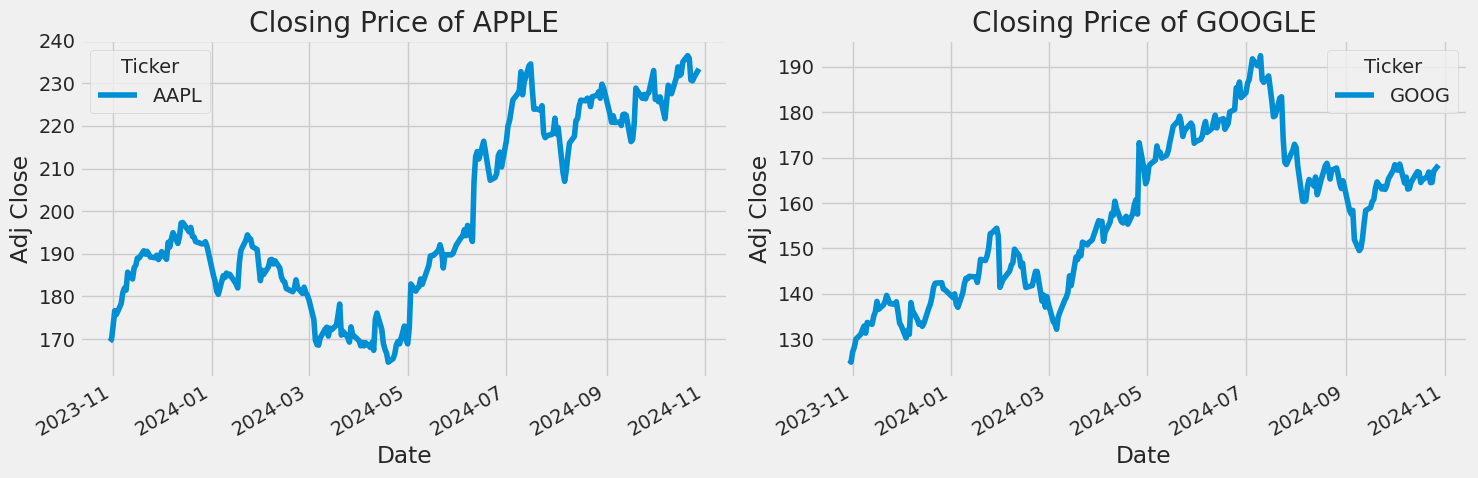

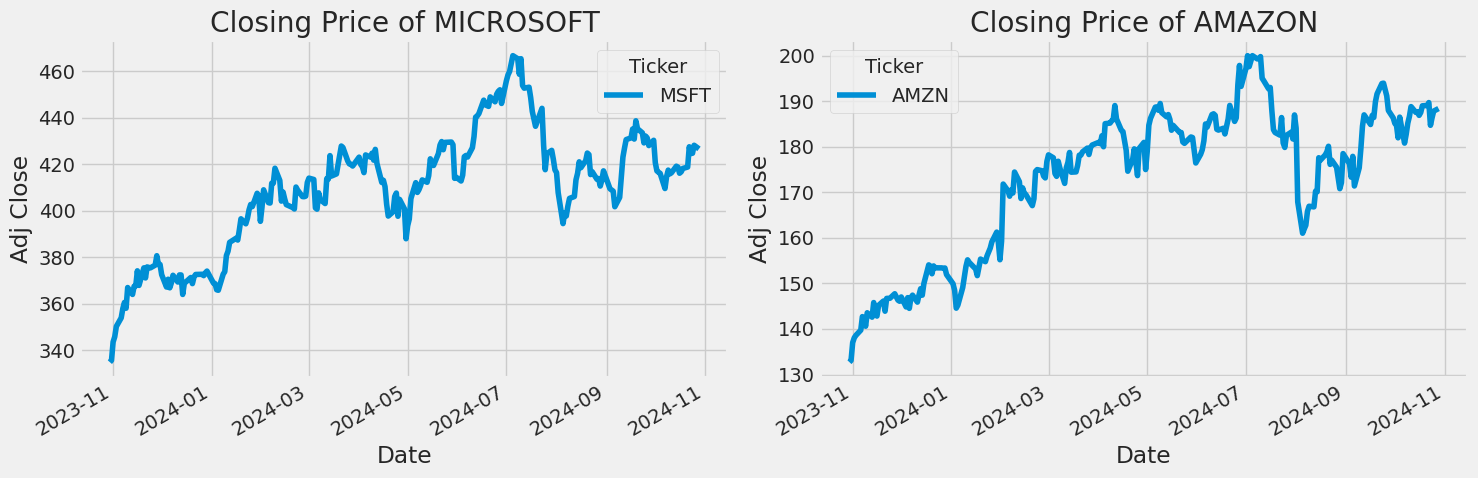

In [ ]:
# First Figure for APPLE and GOOGLE
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(top=1.1, bottom=0.2)

for ax, (company, name) in zip(axes, zip(company_data[:2], ["APPLE", "GOOGLE"])):
    company['Adj Close'].plot(ax=ax)
    ax.set_ylabel('Adj Close')
    ax.set_xlabel('Date')
    ax.set_title(f"Closing Price of {name}")

plt.tight_layout()
plt.show()

# Second Figure for MICROSOFT and AMAZON
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(top=1.1, bottom=0.2)

for ax, (company, name) in zip(axes, zip(company_data[2:], ["MICROSOFT", "AMAZON"])):
    company['Adj Close'].plot(ax=ax)
    ax.set_ylabel('Adj Close')
    ax.set_xlabel('Date')
    ax.set_title(f"Closing Price of {name}")

plt.tight_layout()
plt.show()


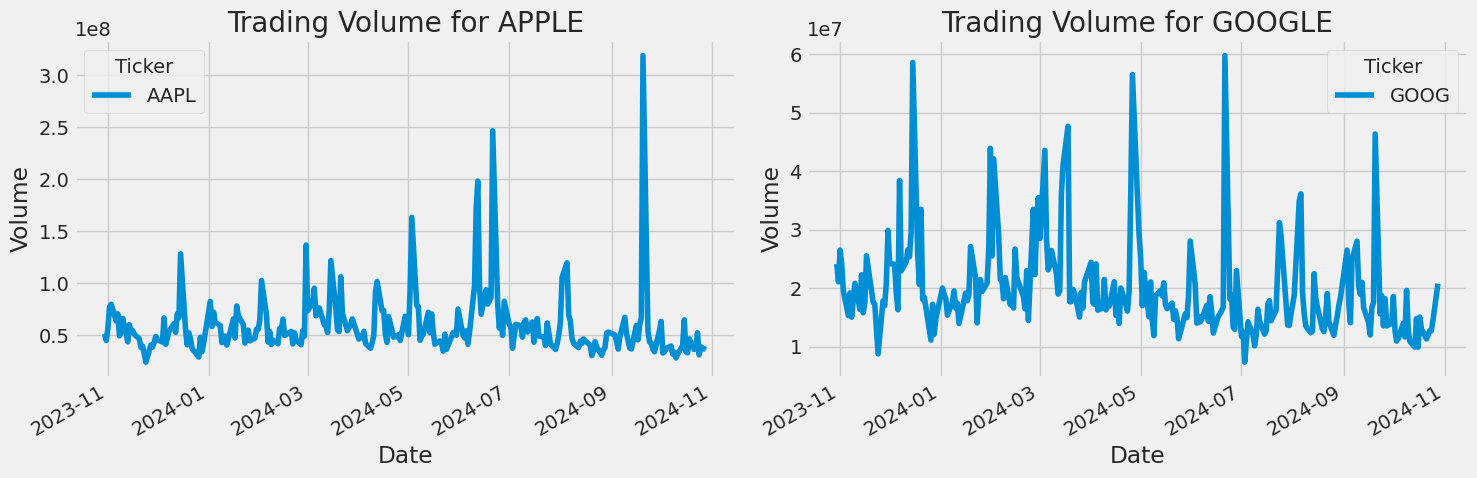

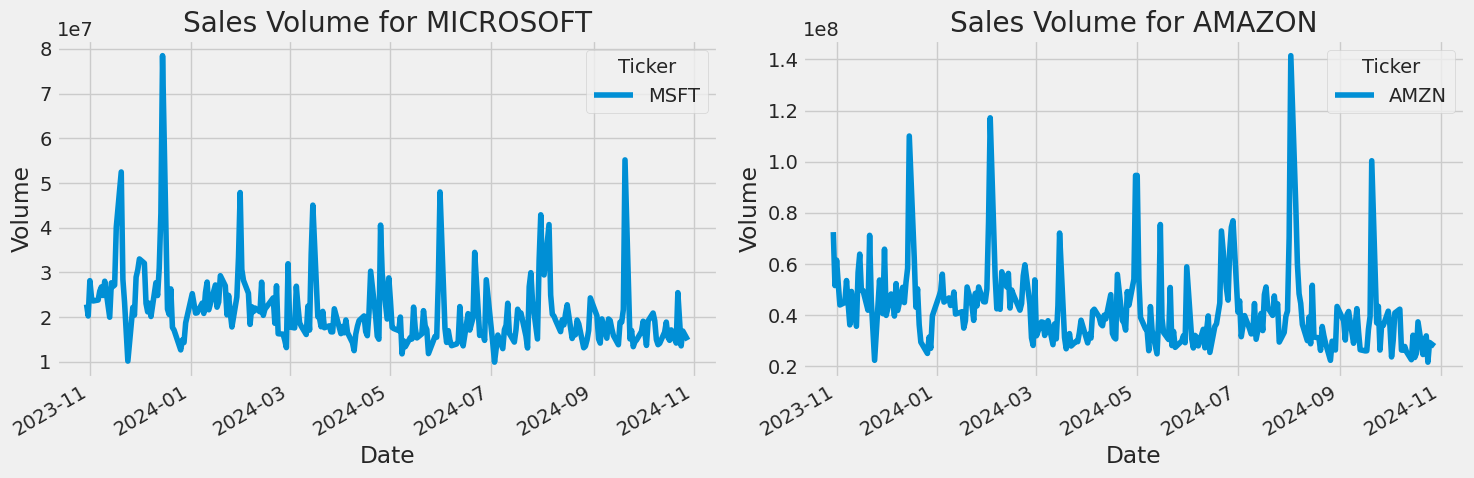

In [ ]:
# First Figure for APPLE and GOOGLE
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(top=1.25)

for ax, (company, name) in zip(axes, zip(company_data[:2], ["APPLE", "GOOGLE"])):
    company['Volume'].plot(ax=ax)
    ax.set_ylabel('Volume')
    ax.set_xlabel('Date')
    ax.set_title(f"Trading Volume for {name}")

plt.tight_layout()
plt.show()

# Second Figure for MICROSOFT and AMAZON
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(top=1.25)

for ax, (company, name) in zip(axes, zip(company_data[2:], ["MICROSOFT", "AMAZON"])):
    company['Volume'].plot(ax=ax)
    ax.set_ylabel('Volume')
    ax.set_xlabel('Date')
    ax.set_title(f"Sales Volume for {name}")

plt.tight_layout()
plt.show()


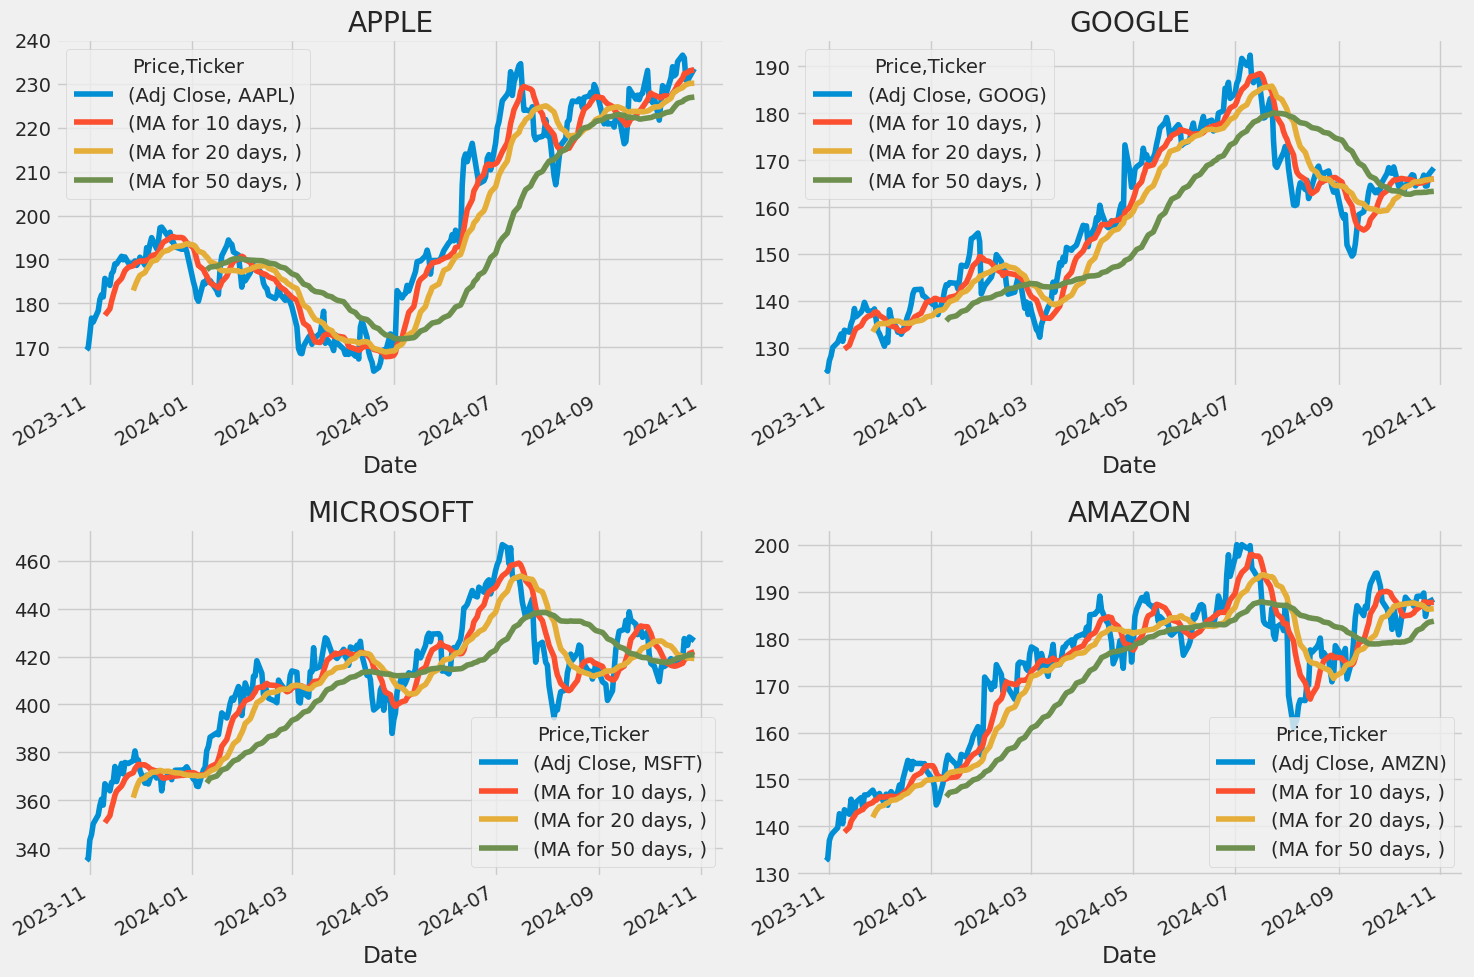

In [ ]:
# Calculate moving averages for specified days
ma_days = [10, 20, 50]

for ma in ma_days:
    for company in company_data:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# Create subplots for the moving averages
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot for APPLE
company_data[0][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 0])
axes[0, 0].set_title('APPLE')

# Plot for GOOGLE
company_data[1][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 1])
axes[0, 1].set_title('GOOGLE')

# Plot for MICROSOFT
company_data[2][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 0])
axes[1, 0].set_title('MICROSOFT')

# Plot for AMAZON
company_data[3][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 1])
axes[1, 1].set_title('AMAZON')

fig.tight_layout()
plt.show()


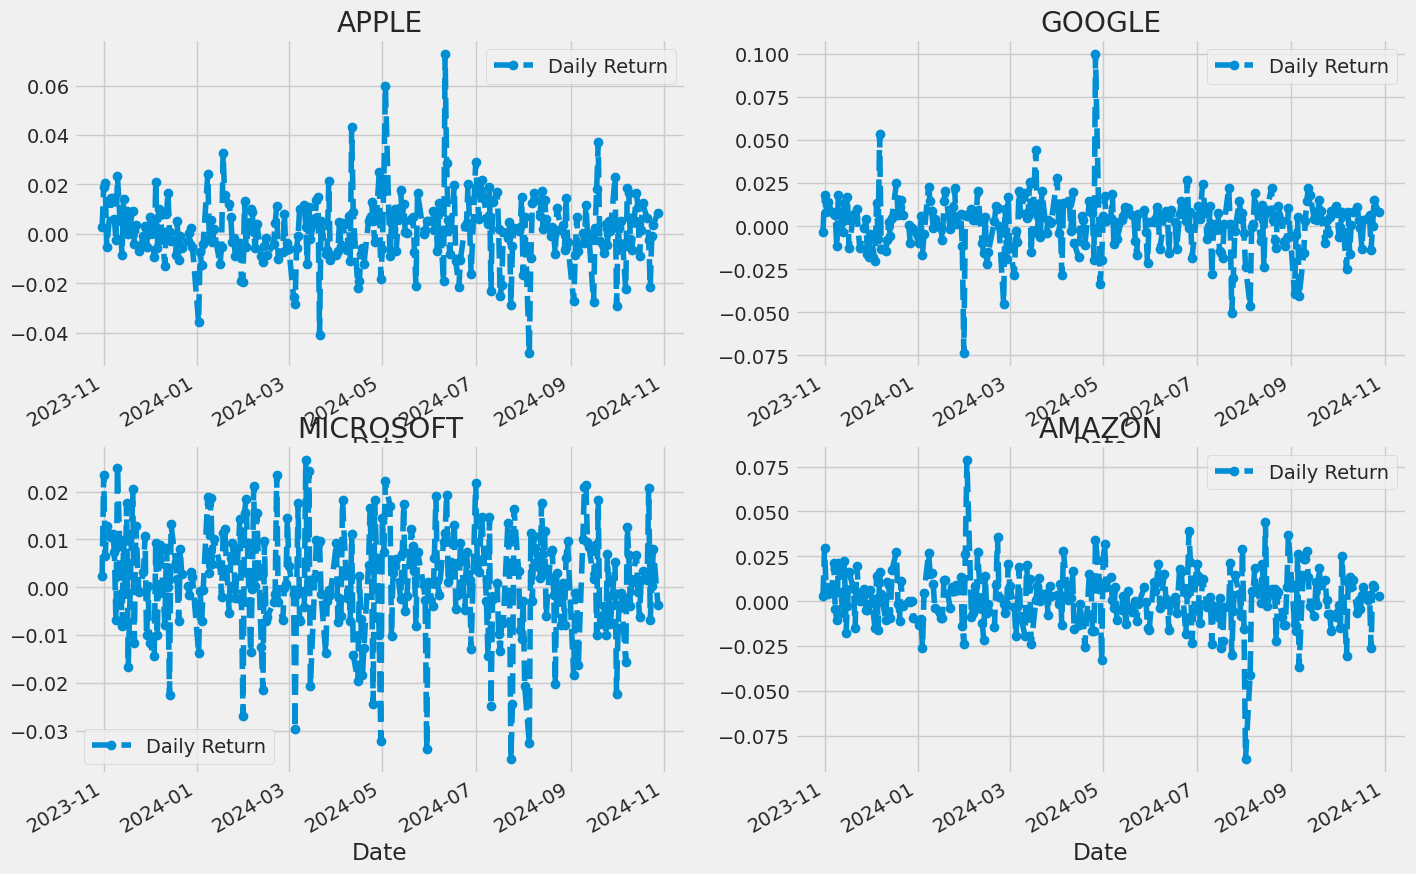

In [ ]:
# Calculate daily return percentage for each company
for company in company_data:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Create subplots for daily returns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.tight_layout(pad=3.0)  # Adjust layout for better spacing

# Plot for APPLE
company_data[0]['Daily Return'].plot(ax=axes[0, 0], legend=True, linestyle='--', marker='o')
axes[0, 0].set_title('APPLE')

# Plot for GOOGLE
company_data[1]['Daily Return'].plot(ax=axes[0, 1], legend=True, linestyle='--', marker='o')
axes[0, 1].set_title('GOOGLE')

# Plot for MICROSOFT
company_data[2]['Daily Return'].plot(ax=axes[1, 0], legend=True, linestyle='--', marker='o')
axes[1, 0].set_title('MICROSOFT')

# Plot for AMAZON
company_data[3]['Daily Return'].plot(ax=axes[1, 1], legend=True, linestyle='--', marker='o')
axes[1, 1].set_title('AMAZON')

plt.show()


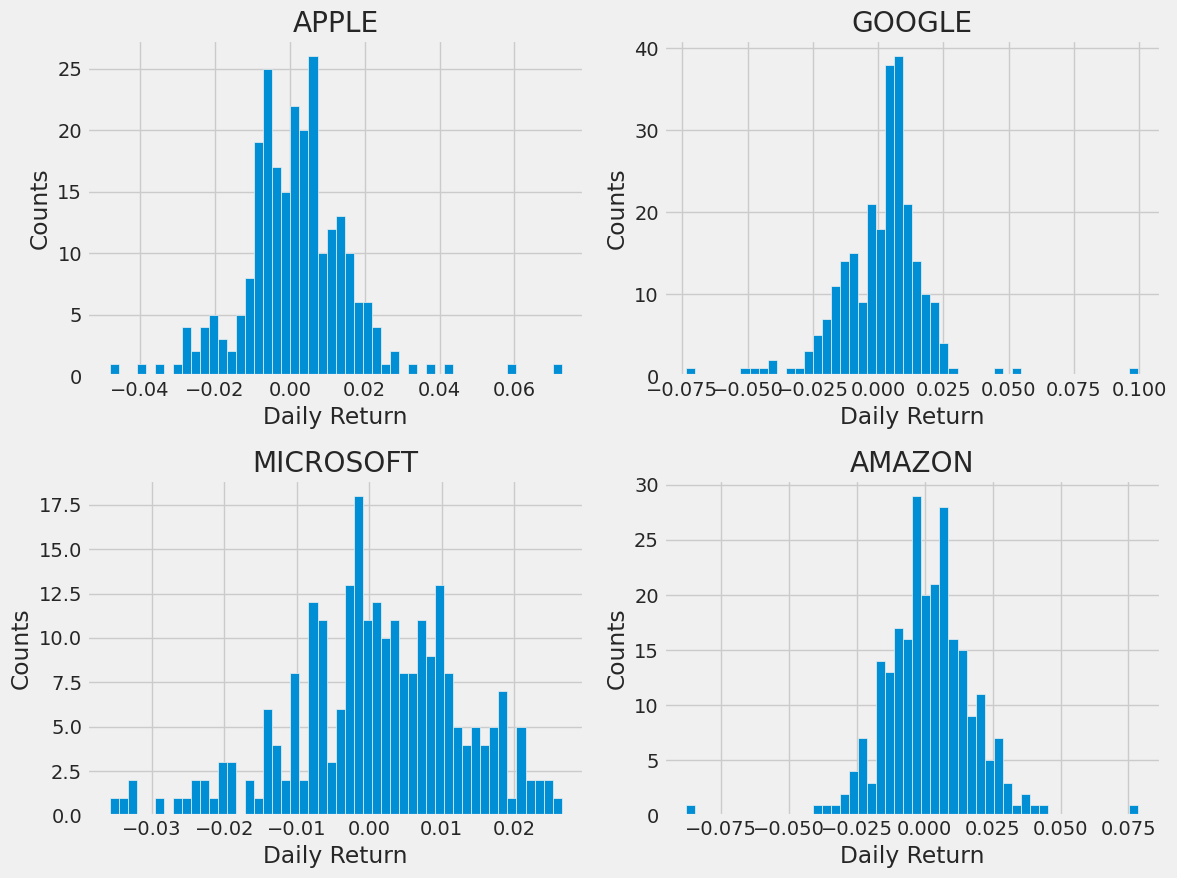

In [ ]:
plt.figure(figsize=(12, 9))

# Loop through each company to plot the histogram of daily returns
for i, (company, name) in enumerate(zip(company_data, company_name), 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{name}')  # Using the company names list for titles

plt.tight_layout()
plt.show()


In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame using yfinance
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

# Display the first few rows of the returns DataFrame
tech_rets.head()


[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-10-30 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-10-31 00:00:00+00:00,0.002819,0.002863,-0.003579,0.002372
2023-11-01 00:00:00+00:00,0.018739,0.029379,0.018116,0.023543
2023-11-02 00:00:00+00:00,0.020693,0.007810,0.007917,0.006502
2023-11-03 00:00:00+00:00,-0.005181,0.003839,0.013921,0.012862


<Figure size 600x600 with 0 Axes>

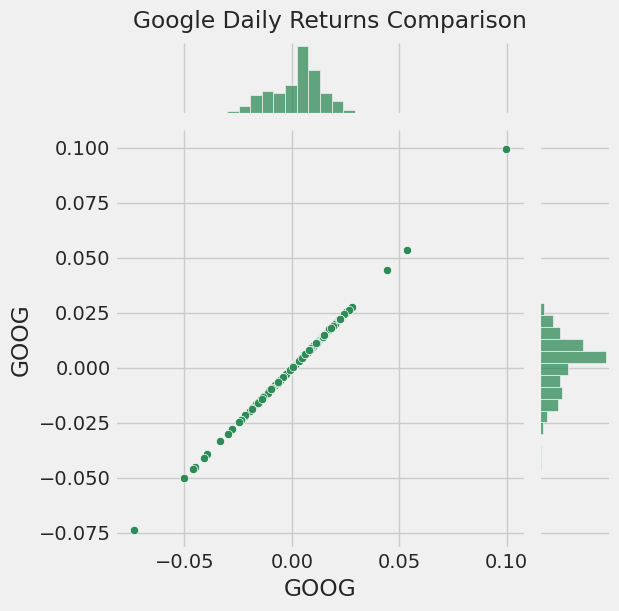

In [ ]:


# Create a new figure for each plot to prevent overlap
plt.figure(figsize=(6, 6))
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')
plt.suptitle('Google Daily Returns Comparison', y=1.02)  # Adjust title positioning
plt.show()


<Figure size 600x600 with 0 Axes>

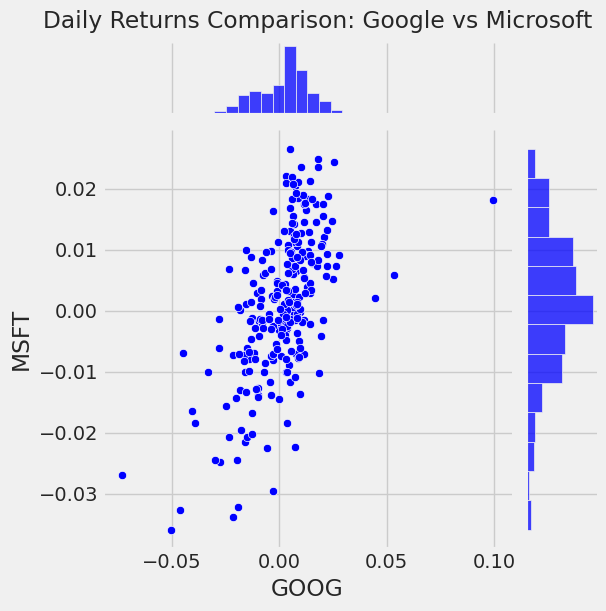

In [ ]:
# Create a jointplot comparing the daily returns of Google and Microsoft
plt.figure(figsize=(6, 6))
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter', color='blue')

# Add a title to the plot, adjusted to avoid overlap
plt.suptitle('Daily Returns Comparison: Google vs Microsoft', y=1.02)

plt.show()

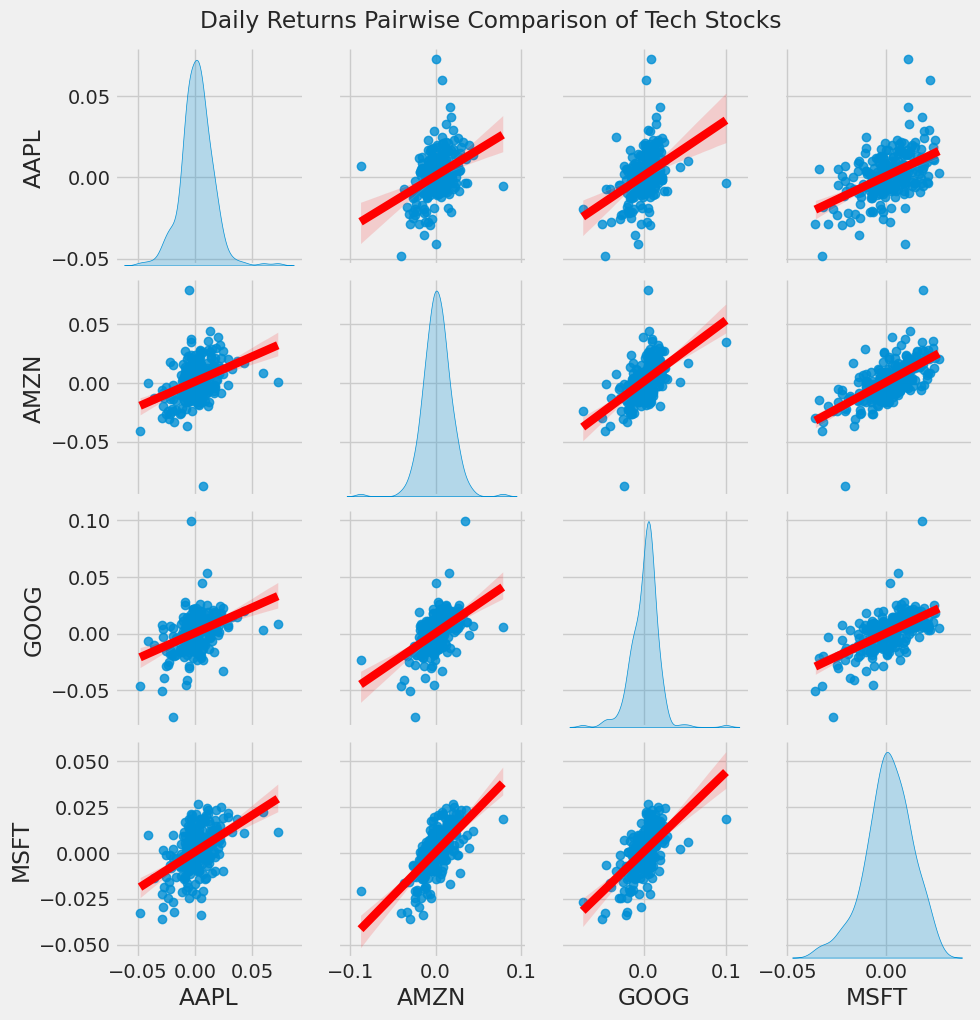

In [ ]:
# Plot pairplot for automatic visual analysis of all comparisons between tech stocks
sns.pairplot(tech_rets, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})

# Adding a title to the entire figure
plt.suptitle('Daily Returns Pairwise Comparison of Tech Stocks', y=1.02)
plt.show()

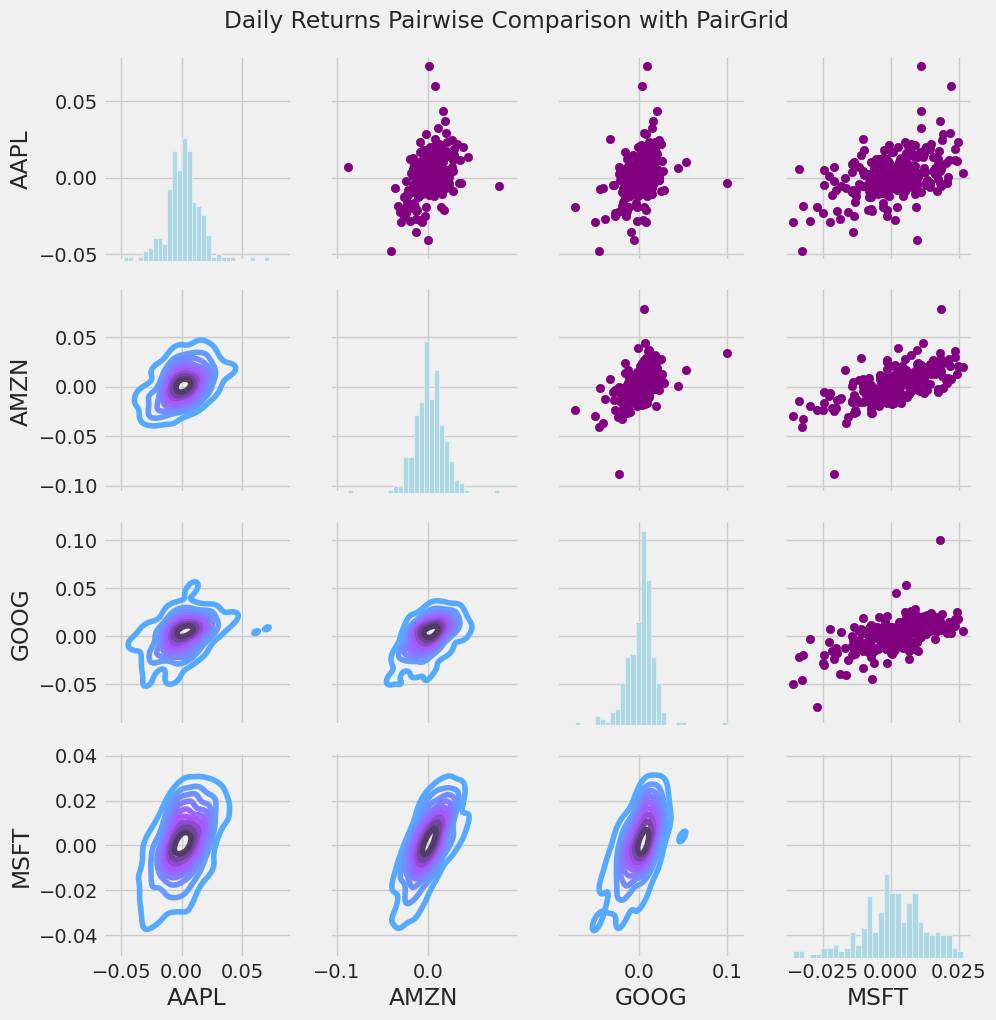

In [ ]:
# Set up our figure by naming it returns_fig, and call PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper to specify the upper triangle as scatter plots
returns_fig.map_upper(plt.scatter, color='purple')

# Define the lower triangle with KDE plots and set a colormap
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Define the diagonal as histograms for each stock's daily return distribution
returns_fig.map_diag(plt.hist, bins=30, color='lightblue')

# Add a title to the figure
plt.suptitle('Daily Returns Pairwise Comparison with PairGrid', y=1.02)
plt.show()

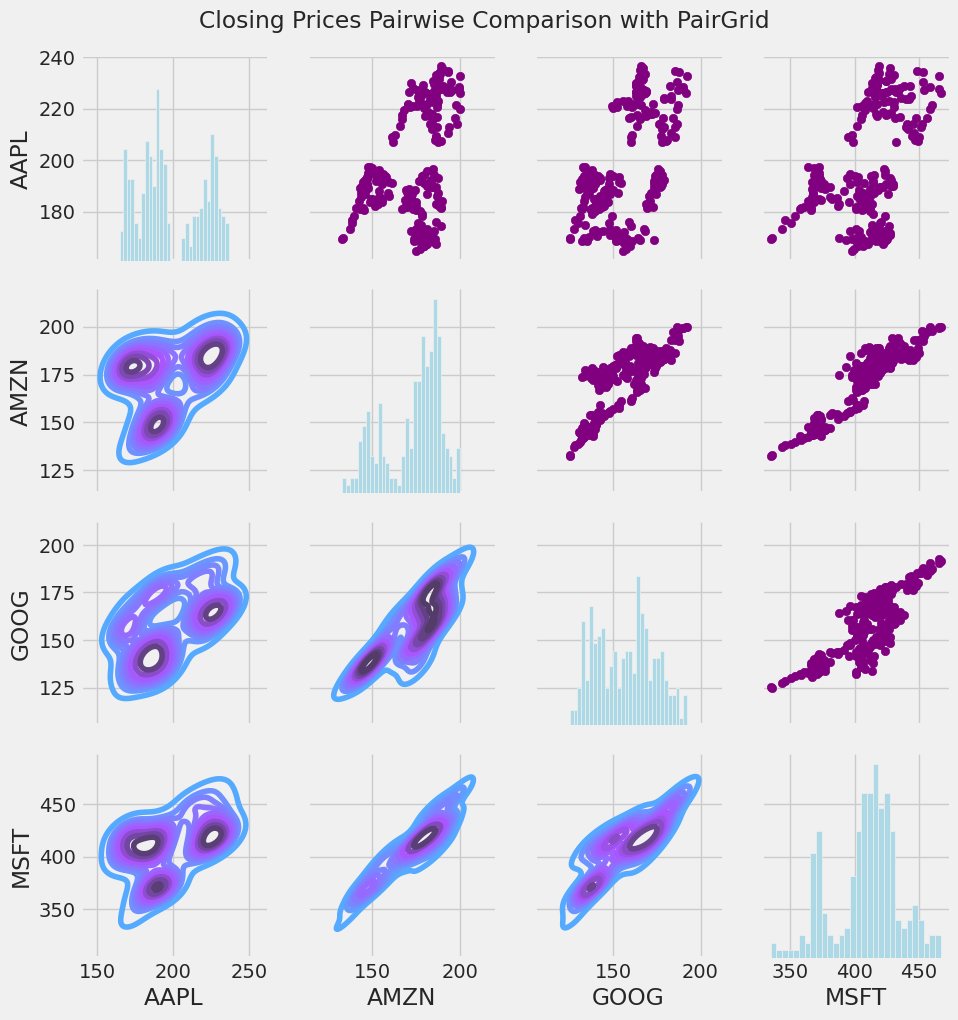

In [ ]:
# Set up our figure by naming it returns_fig, and call PairGrid on the closing prices DataFrame
returns_fig = sns.PairGrid(closing_df.dropna())

# Specify the upper triangle with scatter plots
returns_fig.map_upper(plt.scatter, color='purple')

# Define the lower triangle with KDE plots and set a colormap
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Define the diagonal as histograms showing the distribution of closing prices
returns_fig.map_diag(plt.hist, bins=30, color='lightblue')

# Add a title to the figure
plt.suptitle('Closing Prices Pairwise Comparison with PairGrid', y=1.02)
plt.show()

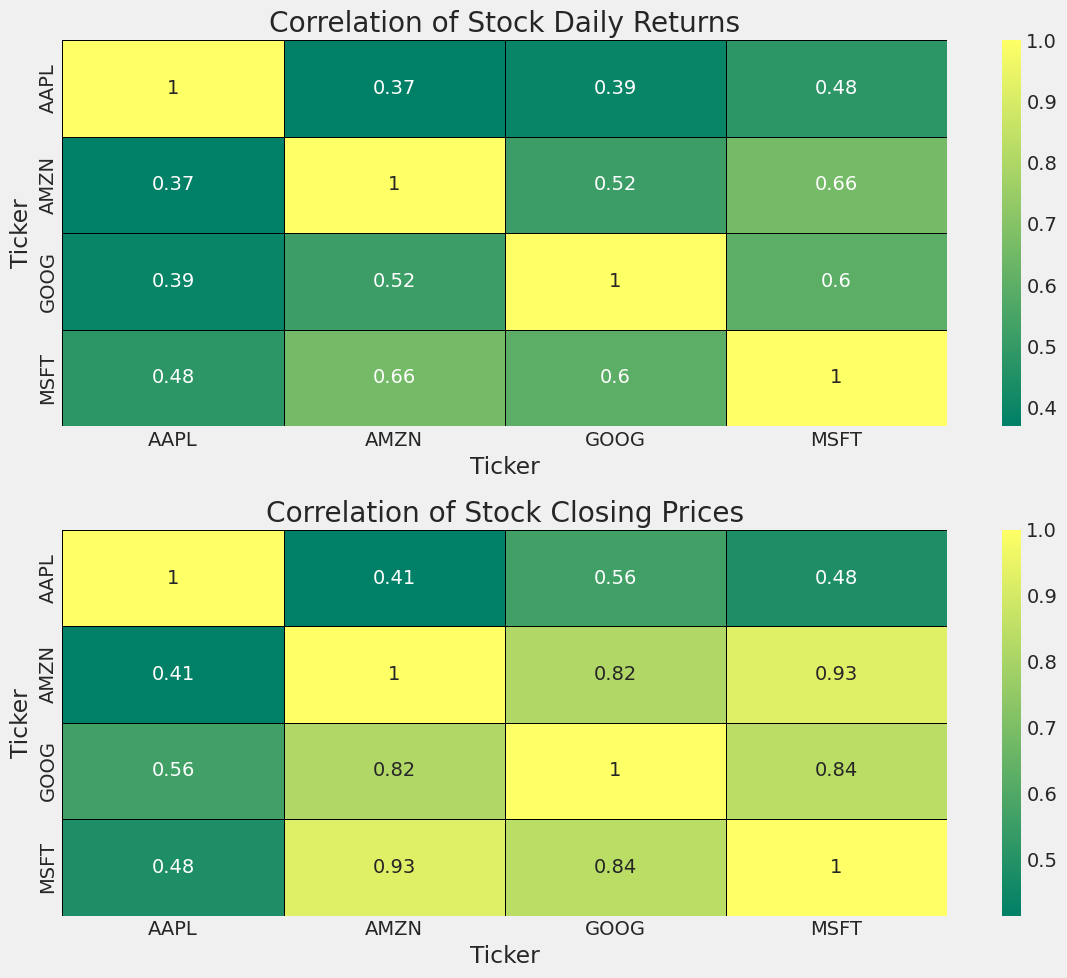

In [ ]:
plt.figure(figsize=(12, 10))

# Heatmap for correlation of stock returns
plt.subplot(2, 1, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer', linewidths=0.5, linecolor='black')
plt.title('Correlation of Stock Daily Returns')

# Heatmap for correlation of stock closing prices
plt.subplot(2, 1, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer', linewidths=0.5, linecolor='black')
plt.title('Correlation of Stock Closing Prices')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

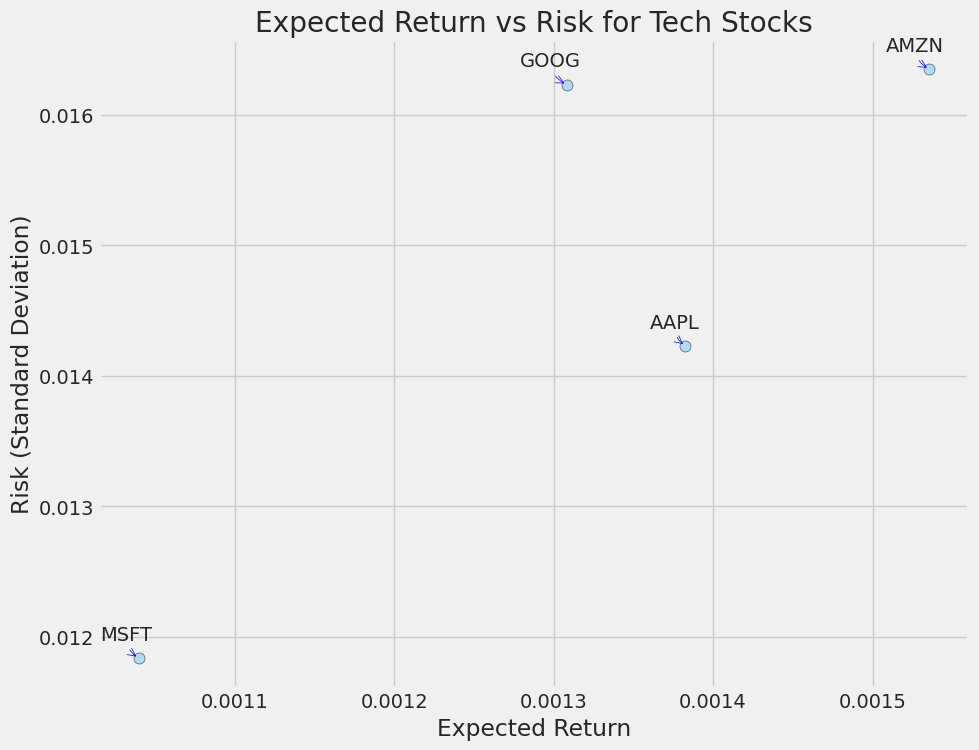

In [ ]:
# Drop any NaN values from tech_rets for accurate calculations
rets = tech_rets.dropna()

# Define the area for scatter points
area = np.pi * 20

# Plotting expected return vs risk
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area, alpha=0.6, color='skyblue', edgecolors='black')
plt.xlabel('Expected Return')
plt.ylabel('Risk (Standard Deviation)')
plt.title('Expected Return vs Risk for Tech Stocks')

# Annotating each point with stock labels
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label,
                 xy=(x, y),
                 xytext=(10, 10),  # Adjust offset for better positioning
                 textcoords='offset points',
                 ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='->', color='blue', connectionstyle='arc3,rad=0.3'))

plt.grid(True)
plt.show()

In [ ]:
# Define the date range for fetching data
start = '2012-01-01'
end = datetime.now()

# Fetch stock data for Apple
df = yf.download('AAPL', start=start, end=end)

# Display the data
df.head()  # Show the first few rows of the DataFrame

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2012-01-03 00:00:00+00:00,12.402628,14.686786,14.732143,14.607143,14.621429,302220800
2012-01-04 00:00:00+00:00,12.469281,14.765714,14.810000,14.617143,14.642857,260022000
2012-01-05 00:00:00+00:00,12.607715,14.929643,14.948214,14.738214,14.819643,271269600
2012-01-06 00:00:00+00:00,12.739511,15.085714,15.098214,14.972143,14.991786,318292800
2012-01-09 00:00:00+00:00,12.719304,15.061786,15.276786,15.048214,15.196429,394024400


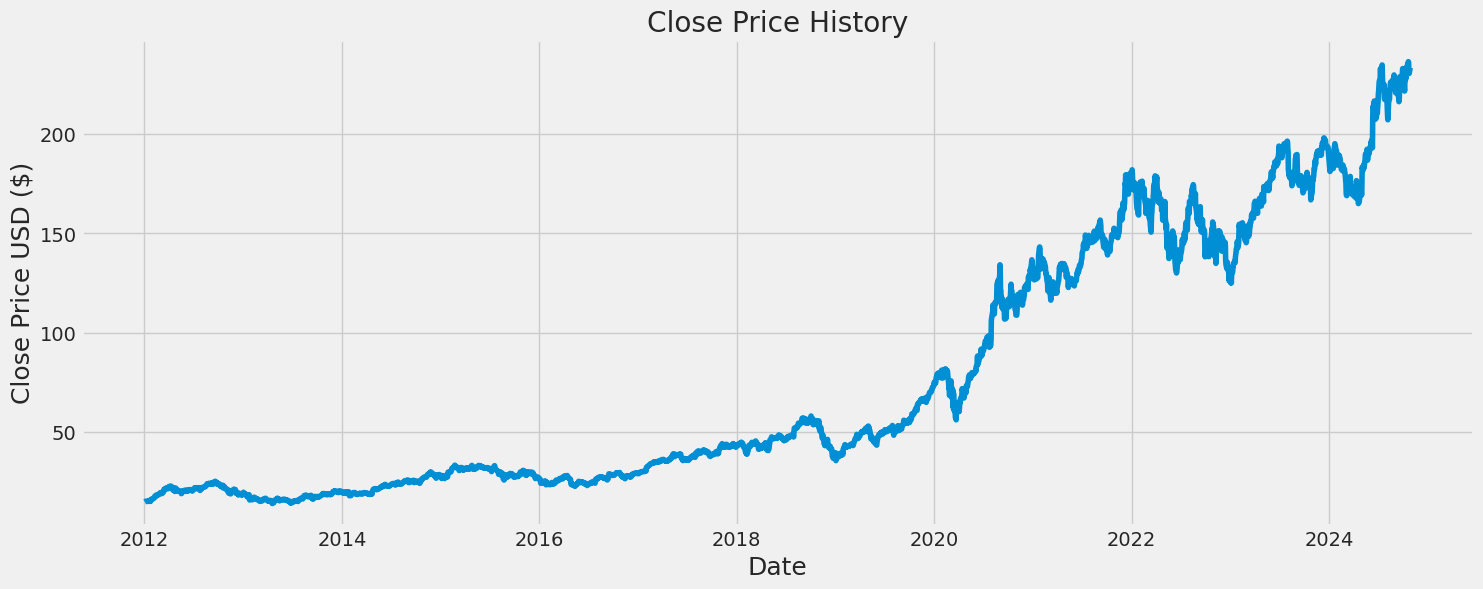

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new DataFrame with only the 'Adj Close' column
data = df.filter(['Adj Close'])  # Using 'Adj Close' instead of 'Close' for accuracy in analysis

# Convert the DataFrame to a NumPy array
dataset = data.values

# Get the number of rows to train the model on (95% of the dataset)
training_data_len = int(np.ceil(len(dataset) * 0.95))

training_data_len  # This will display the length of the training dataset


3065

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

# Define the date range for fetching data
start = '2012-01-01'
end = datetime.now()

# Fetch stock data for Apple
df = yf.download('AAPL', start=start, end=end)

# Display the data to ensure it's loaded correctly
print("DataFrame shape:", df.shape)  # Check the shape of the DataFrame
print("DataFrame head:\n", df.head())  # Display the first few rows

# Create a new DataFrame with only the 'Adj Close' column
data = df.filter(['Adj Close'])  # Using 'Adj Close' for analysis

# Convert the DataFrame to a NumPy array
dataset = data.values

# Verify the shape of the dataset before scaling
print("Dataset shape:", dataset.shape)  # Check the shape of the dataset

# Check if the dataset is empty
if dataset.size == 0:
    print("The dataset is empty. Please check the data fetching process.")
else:
    # Create a MinMaxScaler instance
    scaler = MinMaxScaler(feature_range=(0, 1))

    # Ensure dataset is in the right shape (2D array)
    if dataset.ndim == 1:
        dataset = dataset.reshape(-1, 1)

    # Fit and transform the dataset to scale it
    scaled_data = scaler.fit_transform(dataset)

    # Convert the scaled data back to a DataFrame for better handling
    scaled_data_df = pd.DataFrame(scaled_data, columns=['Scaled Adj Close'], index=data.index)

    # Display the first few rows of the scaled data
    print(scaled_data_df.head())


[*********************100%***********************]  1 of 1 completed

DataFrame shape: (3226, 6)
DataFrame head:
 Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2012-01-03 00:00:00+00:00  12.402626  14.686786  14.732143  14.607143   
2012-01-04 00:00:00+00:00  12.469279  14.765714  14.810000  14.617143   
2012-01-05 00:00:00+00:00  12.607712  14.929643  14.948214  14.738214   
2012-01-06 00:00:00+00:00  12.739513  15.085714  15.098214  14.972143   
2012-01-09 00:00:00+00:00  12.719305  15.061786  15.276786  15.048214   

Price                           Open     Volume  
Ticker                          AAPL       AAPL  
Date                                             
2012-01-03 00:00:00+00:00  14.621429  302220800  
2012-01-04 00:00:00+00:00  14.642857  260022000  
2012-01-05 00:00:00+00:00  14.819643  271269600  
2012-01-06 00:00:00+00:00  14.991786  318292800  
2012-01-09 00:00:00+0

In [ ]:


# Define the date range for fetching data
start = '2012-01-01'
end = datetime.now()

# Fetch stock data for Apple
df = yf.download('AAPL', start=start, end=end)

# Check if the DataFrame is empty
if df.empty:
    print("DataFrame is empty. Please check the ticker symbol and date range.")
else:
    # Create a new DataFrame with only the 'Adj Close' column
    data = df[['Adj Close']].copy()
    dataset = data.values  # Convert to NumPy array

    # Verify the dataset shape and contents
    print("Dataset Shape:", dataset.shape)  # Should print (number_of_rows, 1)
    print("Dataset Contents:", dataset[:5])  # Check the first few rows

    # Now scale the data
    if dataset.shape[0] > 0:  # Ensure dataset has rows
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(dataset)
        print("Scaled Data Shape:", scaled_data.shape)  # Should print (number_of_rows, 1)
    else:
        print("The dataset has no rows. Cannot scale data.")


[*********************100%***********************]  1 of 1 completed

Dataset Shape: (3226, 1)
Dataset Contents: [[12.40262794]
 [12.46927738]
 [12.60771275]
 [12.7395153 ]
 [12.71930504]]
Scaled Data Shape: (3226, 1)


In [ ]:
# Create the training data set
# Ensure training_data_len is defined before this point
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

# Create the training data
for i in range(60, len(train_data)):
    # Append the last 60 days of training data to x_train
    x_train.append(train_data[i-60:i, 0])
    # Append the current day's value to y_train
    y_train.append(train_data[i, 0])

    # Print the first few entries of x_train and y_train for debugging
    if i <= 61:
        print("x_train:", x_train)
        print("y_train:", y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the x_train data to be 3-dimensional for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Print the shape of x_train for verification
print("x_train shape:", x_train.shape)  # Expected shape: (samples, 60, 1)
print("y_train shape:", y_train.shape)  # Expected shape: (samples,)


x_train: [array([0.00200624, 0.00230309, 0.00291965, 0.00350667, 0.00341666,
       0.00361948, 0.0035268 , 0.00337098, 0.00315875, 0.0038156 ,
       0.00440798, 0.0042253 , 0.00322457, 0.00417963, 0.00323936,
       0.0067654 , 0.00649271, 0.00684867, 0.00761836, 0.00808447,
       0.00804551, 0.00790179, 0.00851433, 0.00909058, 0.00974341,
       0.01079786, 0.01301287, 0.01304648, 0.01427955, 0.01520105,
       0.01361736, 0.01422716, 0.01421509, 0.01592505, 0.01568192,
       0.01613194, 0.01694056, 0.01739056, 0.01868681, 0.01963107,
       0.01990377, 0.01999913, 0.01838454, 0.01799501, 0.01805278,
       0.01957065, 0.01999782, 0.02091529, 0.02307791, 0.02596321,
       0.0254232 , 0.02542455, 0.02751065, 0.02816348, 0.02769869,
       0.02727421, 0.02683228, 0.02830045, 0.02930792, 0.02972968])]
y_train: [0.028687322017633535]

x_train: [array([0.00200624, 0.00230309, 0.00291965, 0.00350667, 0.00341666,
       0.00361948, 0.0035268 , 0.00337098, 0.00315875, 0.0038156 ,
       

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()

# First LSTM layer with 128 units and return sequences set to True
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# Second LSTM layer with 64 units and return sequences set to False
model.add(LSTM(64, return_sequences=False))

# Fully connected layer with 25 units
model.add(Dense(25))

# Output layer with 1 unit for prediction
model.add(Dense(1))

# Compile the model using Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with the training data, using a batch size of 1 and 1 epoch
model.fit(x_train, y_train, batch_size=1, epochs=1)


3005/3005 ━━━━━━━━━━━━━━━━━━━━ 158s 52ms/step - loss: 0.0018


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index (training_data_len - 60) to the end
test_data = scaled_data[training_data_len - 60:, :]

# Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

# Fill the x_test array with the last 60 days of data
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the x_test data to a numpy array
x_test = np.array(x_test)

# Reshape the x_test data for input into the model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)

# Inverse transform the predictions to get actual price values
predictions = scaler.inverse_transform(predictions)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

# Output the RMSE
rmse


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


4.59529957103987

Length mismatch: predictions length is 161 but validation set length is 646


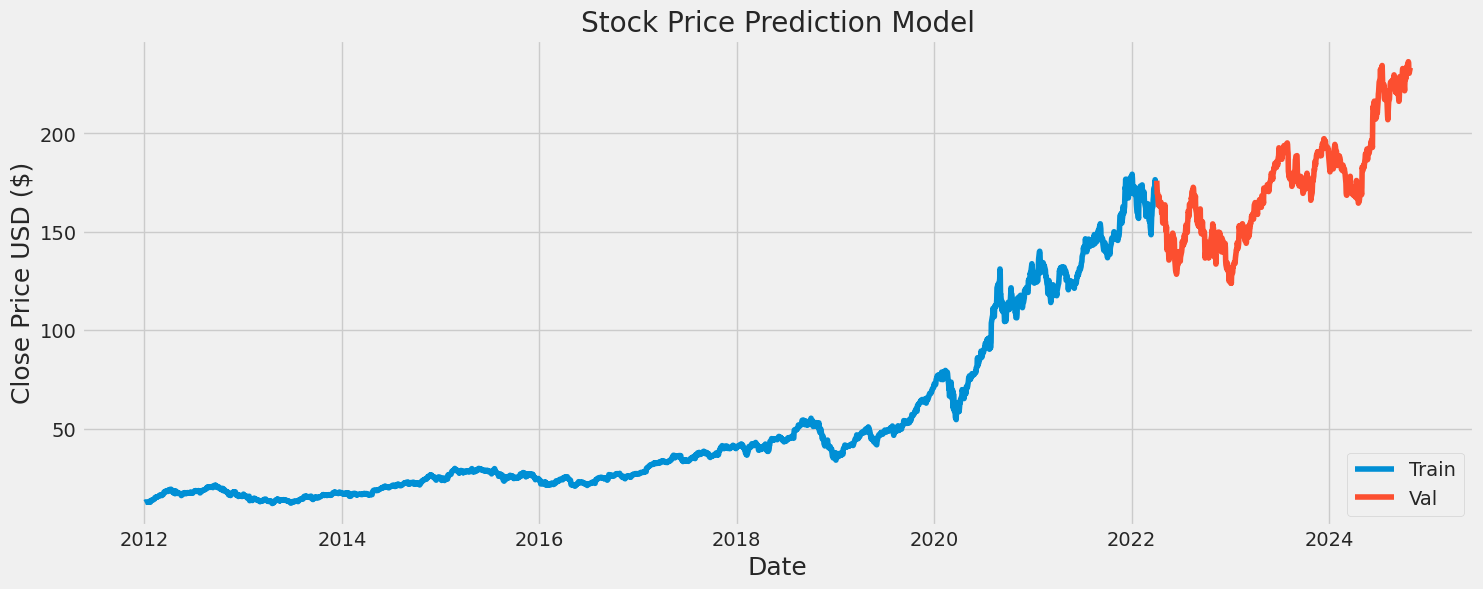

In [ ]:
# Ensure predictions is a Series and matches the validation set length
if len(predictions) == len(valid):
    valid['Predictions'] = pd.Series(predictions, index=valid.index)
else:
    print(f"Length mismatch: predictions length is {len(predictions)} but validation set length is {len(valid)}")

# Plot the data
plt.figure(figsize=(16,6))
plt.title('Stock Price Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], label='Train')
plt.plot(valid['Close'], label='Val')

# Only plot predictions if added successfully
if 'Predictions' in valid.columns:
    plt.plot(valid['Predictions'], label='Predictions')

plt.legend(loc='lower right')
plt.show()


In [ ]:
# Show the validation set with actual and predicted prices
valid


Price,Close
Ticker,AAPL
Date,
2022-04-04 00:00:00+00:00,175.981216
2022-04-05 00:00:00+00:00,172.647781
2022-04-06 00:00:00+00:00,169.462296
2022-04-07 00:00:00+00:00,169.768021
2022-04-08 00:00:00+00:00,167.746246
...,...
2024-10-22 00:00:00+00:00,235.860001
2024-10-23 00:00:00+00:00,230.759995
